In [1]:
import numpy as np
from SED_v8 import AGN
from astropy.io import ascii
from SED_plots_v2 import Plotter
import matplotlib.pyplot as plt
from astropy.io import fits
from match import match

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject


In [2]:
# inf = ascii.read('/Users/connor_auge/Desktop/M82.csv')
inf = ascii.read('/Users/connor_auge/Desktop/M82_cut.csv')


In [3]:
z = 0.00090
z = 1.2
Lx = np.nan
flux_array = np.asarray(inf['Flux Density'])*1E6
flux_array_err = flux_array*0.2
# filters = np.array(['Fx_hard','FLUX_GALEX_FUV','FLUX_GALEX_NUV','u_FLUX_APER2','B_FLUX_APER2','V_FLUX_APER2','R_Johnson','I_Cousins','J_2mass','H_2mass','Ks_2mass','W1','SPLASH_1_FLUX','SPLASH_2_FLUX','W2','SPLASH_3_FLUX','SPLASH_4_FLUX','W3','IRAS1','W4','FLUX_24','IRAS3','MIPS2','IRAS4','FLUX_160','FLUX_250','FLUX_350','FLUX_500','SCUBA2'])
filters = np.array(['Fx_hard','FLUX_GALEX_FUV','FLUX_GALEX_NUV','u_FLUX_APER2','B_FLUX_APER2','V_FLUX_APER2','R_Johnson','I_Cousins','J_2mass','H_2mass','Ks_2mass','W1','SPLASH_1_FLUX','SPLASH_2_FLUX','SPLASH_3_FLUX','SPLASH_4_FLUX','IRAS1','FLUX_24','IRAS3','MIPS2','IRAS4','FLUX_160','FLUX_250','FLUX_350','FLUX_500','SCUBA2'])

print(len(flux_array),len(filters))

26 26


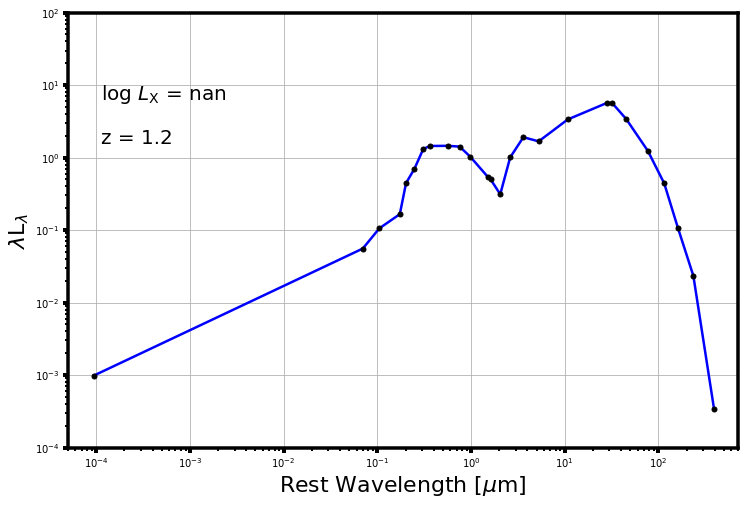

1.4256994425953947e+51
3.751840638408934e+17


In [4]:
source = AGN('M82',z,filters,flux_array,flux_array_err)
source.MakeSED()
source.FIR_extrap(['FLUX_24', 'IRAS3', 'MIPS2', 'IRAS4', 'FLUX_160', 'FLUX_250', 'FLUX_350', 'FLUX_500', 'SCUBA2'])
f1 = source.Find_value(1.0)
Id, redshift, w, f, frac_err = source.pull_plot_info(norm_w=1)
ix, iy = source.Int_SED(xmin=1E-1, xmax=5E2)
wfir, ffir = source.Int_SED_FIR(discreet=True)

lbol = source.Find_Lbol()

up_check = 0
plot = Plotter(Id, redshift, w, f, Lx, f1, up_check)
plot.PlotSED()
print(lbol)
print(lbol/3.8E33)

In [27]:
(918.9-803.5)/918.9

0.12558493851343996

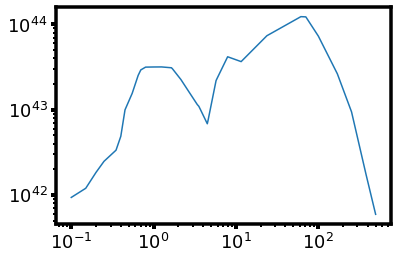

In [18]:
plt.plot(ix, 10**iy)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [35]:
outf = open('/Users/connor_auge/Research/templets/M82.csv','w')
outf.writelines('# wave, lum\n')
for i in range(len(ix)):
    outf.writelines('%f, %f\n' % (ix[i], 10**iy[i]))
outf.close()

In [5]:
temp = ascii.read('/Users/connor_auge/Research/templets/A10_templates.txt')
temp_wave = np.asarray(temp['Wave'])
temp_flux = np.asarray(temp['E'])*1E-16  # erg/s/cm^-2/Hz
temp_wave_cgs = temp_wave*1E-8
temp_freq = 3E10/temp_wave_cgs
temp_nuFnu = temp_flux*temp_freq

dl = 10
dl_cgs = dl*3.086E18
temp_lum = temp_nuFnu*4*np.pi*dl_cgs**2


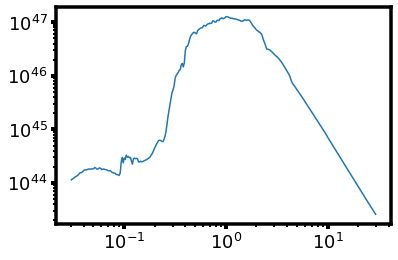

In [19]:
plt.plot(temp_wave,temp_lum)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [33]:
print(iy[ix == 1.0000000000000004][0])


43.50009988334195


In [32]:
print(temp_lum[temp_wave == 1.0050][0])

1.2659749764103498e+47


In [6]:
with fits.open('/Users/connor_auge/Research/Disertation/AGN_SEDs/AHA_SED_paper1/Final_plots/a_six/a_final/SED_paper_tables/Appendix_Table1.fits') as hdul:
    cols = hdul[1].columns
    data = hdul[1].data

print(cols)

ColDefs(
    name = 'Field'; format = '32A'
    name = 'x_ID'; format = '32A'
    name = 'phot_id'; format = '32A'
    name = 'RAJ2000'; format = '32A'
    name = 'DEJ2000'; format = '32A'
    name = 'L0510_c'; format = 'D'
    name = 'z_spec'; format = 'D'
    name = 'Nh'; format = 'D'
    name = 'Lbol'; format = 'D'
    name = 'SED_shape'; format = 'D'
)


In [27]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [35]:
field = data['Field']
ra = data['raJ2000']
dec = data['dej2000']
z = data['z_spec']
id = data['x_ID']

c = SkyCoord(ra=ra,dec=dec, unit=(u.hourangle, u.deg))
coords = c.to_string('decimal')
RA = []
DEC = []
for i in range(len(coords)):
    C = coords[i].split()
    RA.append(C[0])
    DEC.append(C[1])
RA = np.asarray(RA)
DEC = np.asarray(DEC)

ID_goods = id[np.logical_or(field == 'GOODS-N', field == 'GOODS-S')]
ra_goods = RA[np.logical_or(field == 'GOODS-N', field == 'GOODS-S')]
dec_goods = DEC[np.logical_or(field == 'GOODS-N', field == 'GOODS-S')]
z_goods = z[np.logical_or(field == 'GOODS-N', field == 'GOODS-S')]

ID_s82x = id[field == 'Stripe82X']
ra_s82x = RA[field == 'Stripe82X']
dec_s82x = DEC[field == 'Stripe82X'] 
z_s82x = z[field == 'Stripe82X']


In [38]:
goods_outf = open('/Users/connor_auge/Desktop/Auge_GOODS_targets.csv','w')
goods_outf.writelines('# ID, RA, DEC, z\n')
for i in range(len(ID_goods)):
    goods_outf.writelines('%s, %s, %s, %s\n' % (ID_goods[i], ra_goods[i], dec_goods[i], z_goods[i]))
goods_outf.close()

s82x_outf = open('/Users/connor_auge/Desktop/Auge_S82X_targets.csv', 'w')
s82x_outf.writelines('# ID, RA, DEC, z\n')
for i in range(100):
    s82x_outf.writelines('%s, %s, %s, %s\n' % (ID_s82x[i], ra_s82x[i], dec_s82x[i], z_s82x[i]))
s82x_outf.close()
